<a href="https://colab.research.google.com/github/AkasK09/Shell-Green-AI-Internship/blob/main/Week1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/content/SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv")

In [22]:
print("🔍 First 5 rows:\n", df.head())
print("\n📋 Dataset Info:\n")
df.info()


🔍 First 5 rows:
   Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms  carbon dioxide   
1         111CA                                      Farms         methane   
2         111CA                                      Farms   nitrous oxide   
3         111CA                                      Farms      other GHGs   
4         113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.424   
1                                          0.023   
2                                          0.002   
3                                          0.004   
4            

In [23]:
print("\n❓ Missing Values:\n", df.isnull().sum())


❓ Missing Values:
 Industry Code                                               0
Industry Name                                               0
Substance                                                   0
Unit                                                        0
Supply Chain Emission Factors without Margins               0
Margins of Supply Chain Emission Factors                    0
Supply Chain Emission Factors with Margins                  0
Unnamed: 7                                                264
DQ ReliabilityScore of Factors without Margins              0
DQ TemporalCorrelation of Factors without Margins           0
DQ GeographicalCorrelation of Factors without Margins       0
DQ TechnologicalCorrelation of Factors without Margins      0
DQ DataCollection of Factors without Margins                0
dtype: int64


In [24]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [25]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled!\n")
print(df.isnull().sum())



✅ Missing values handled!

Industry Code                                               0
Industry Name                                               0
Substance                                                   0
Unit                                                        0
Supply Chain Emission Factors without Margins               0
Margins of Supply Chain Emission Factors                    0
Supply Chain Emission Factors with Margins                  0
Unnamed: 7                                                264
DQ ReliabilityScore of Factors without Margins              0
DQ TemporalCorrelation of Factors without Margins           0
DQ GeographicalCorrelation of Factors without Margins       0
DQ TechnologicalCorrelation of Factors without Margins      0
DQ DataCollection of Factors without Margins                0
dtype: int64


/tmp/ipython-input-25-444181869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


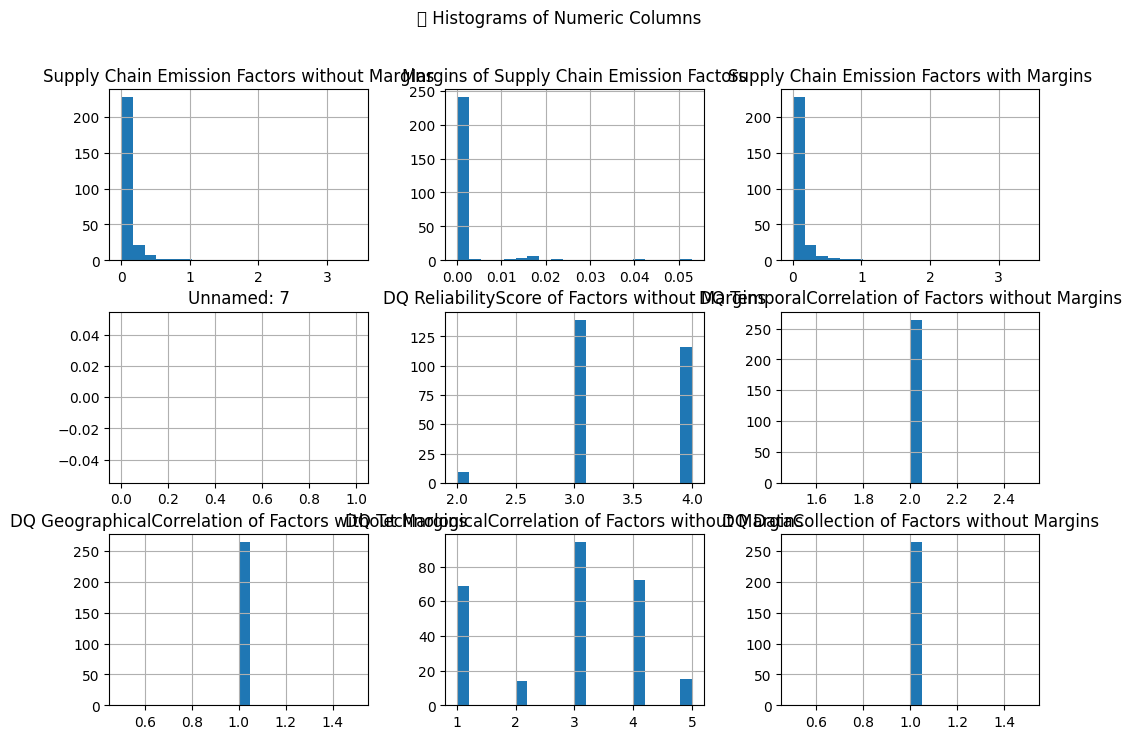

In [26]:
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("📊 Histograms of Numeric Columns")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


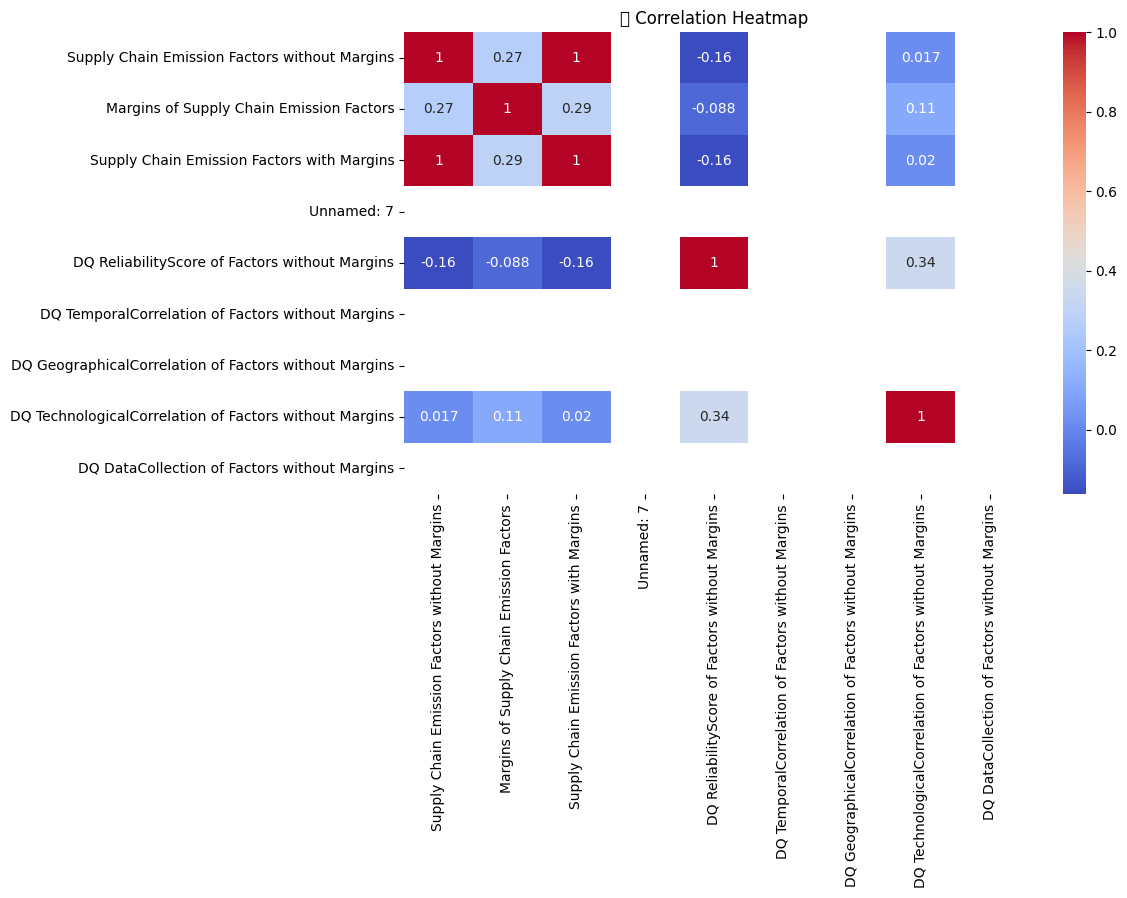

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("🔥 Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


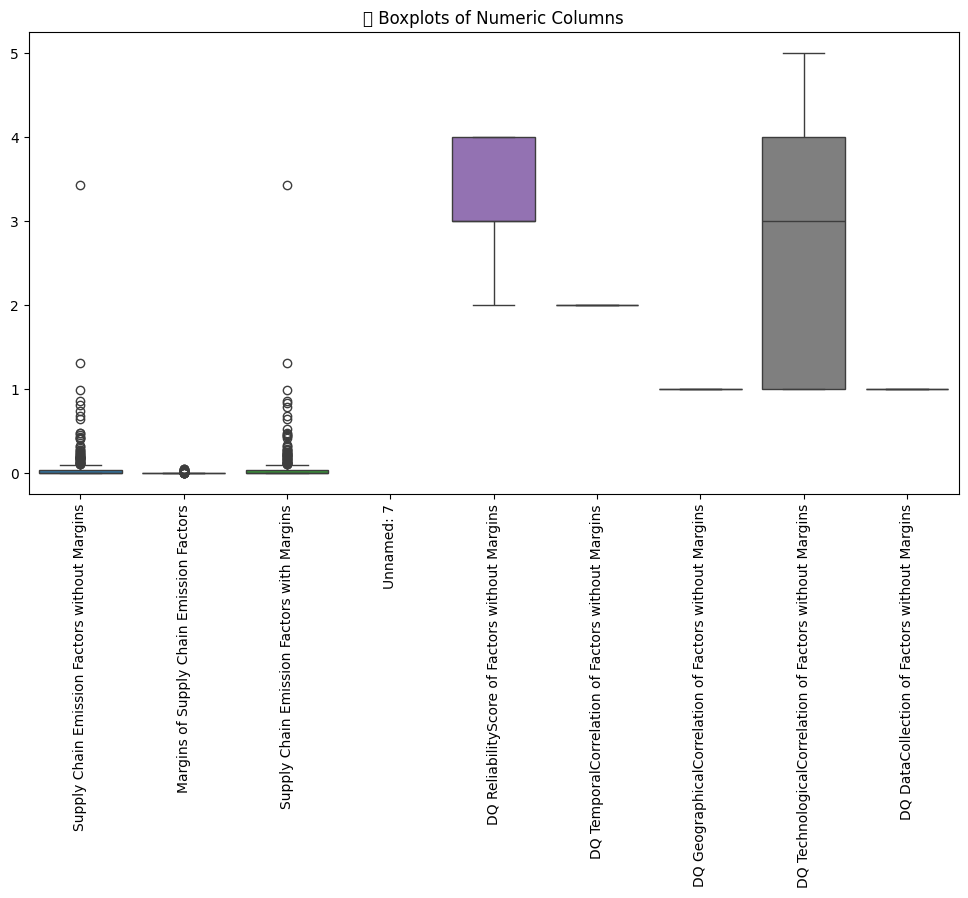

In [28]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("📦 Boxplots of Numeric Columns")
plt.show()

In [29]:
df.to_csv("cleaned_dataset_filled.csv", index=False)
print("💾 Cleaned dataset saved as 'cleaned_dataset_filled.csv'")

💾 Cleaned dataset saved as 'cleaned_dataset_filled.csv'


In [32]:
files.download("cleaned_dataset_filled.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>